# HIRE or NOT !

## Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Import the Dataset

In [42]:
dataset = pd.read_csv('recruitment_data.csv')

### Display of top rows of dataset

In [43]:
dataset.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


## Variables Description :

Age :
Data Range: 20 to 50 years.

Gender :
 Male (0) or Female (1).

Education Level :<br>
Categories:<br>
1: Bachelor's <br>
2: Bachelor's <br>
3: Master's<br>
4: PhD<br>

Experience Years :
Data Range: 0 to 15 years.

Previous Companies Worked :
Data Range: 1 to 5 companies.

Distance From Company :
Data Range: 1 to 50 kilometers.

Interview Score :
Data Range: 0 to 100.

Skill Score :
Data Range: 0 to 100.

Personality Score :
Data Range: 0 to 100.

Recruitment Strategy :
Description: Strategy adopted by the hiring team for recruitment.<br>
Categories:<br>
1: Aggressive<br>
2: Moderate<br>
3: Conservative<br>

Hiring Decision :<br>
0: Not hired<br>
1: Hired<br>

# Exploratory Data Analysis

### Basic description about the data

In [44]:
dataset.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


### Checking for any missing value(s)

In [45]:
dataset.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

--> There are no missing values in the data

### Understanding the correlations between other variables and hiring decision

In [46]:
dataset.corr()['HiringDecision']

Age                    0.001850
Gender                -0.002249
EducationLevel         0.236710
ExperienceYears        0.122494
PreviousCompanies      0.044025
DistanceFromCompany   -0.016791
InterviewScore         0.146064
SkillScore             0.203668
PersonalityScore       0.169177
RecruitmentStrategy   -0.477552
HiringDecision         1.000000
Name: HiringDecision, dtype: float64

--> This describes how all parameters are correlated with the 'Hiring Decision'

## Exploring through Age

### Selecting the required columns

In [47]:
dataset_age = dataset[['Age', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'HiringDecision']]

### Setting the intervals

In [48]:
bins = [20, 25, 30, 35, 40, 45, 50]
intervals = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50']

### Adding a new column for the age group

In [49]:
dataset_age['AgeGroup'] = pd.cut(dataset_age['Age'], bins=bins, labels=intervals, right=False)

C:\Users\yashyashahshah2005\AppData\Local\Temp\ipykernel_6608\2599421336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_age['AgeGroup'] = pd.cut(dataset_age['Age'], bins=bins, labels=intervals, right=False)


### Creating dataframes according to the column considered

In [50]:
dataset_age_na = dataset_age.groupby('AgeGroup').size()
dataset_age_dfc = dataset_age[['AgeGroup', 'DistanceFromCompany']].groupby('AgeGroup').mean(numeric_only = True)
dataset_age_pc = dataset_age[['AgeGroup', 'PreviousCompanies']].groupby('AgeGroup').mean(numeric_only = True)
dataset_age_is = dataset_age[['AgeGroup', 'InterviewScore']].groupby('AgeGroup').mean(numeric_only = True)
dataset_age_ss = dataset_age[['AgeGroup', 'SkillScore']].groupby('AgeGroup').mean(numeric_only = True)
dataset_age_ps = dataset_age[['AgeGroup', 'PersonalityScore']].groupby('AgeGroup').mean(numeric_only = True)

C:\Users\yashyashahshah2005\AppData\Local\Temp\ipykernel_6608\2727643561.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset_age_na = dataset_age.groupby('AgeGroup').size()
C:\Users\yashyashahshah2005\AppData\Local\Temp\ipykernel_6608\2727643561.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset_age_dfc = dataset_age[['AgeGroup', 'DistanceFromCompany']].groupby('AgeGroup').mean(numeric_only = True)
C:\Users\yashyashahshah2005\AppData\Local\Temp\ipykernel_6608\2727643561.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. 

### Printing the generated dataframes

In [51]:
print(dataset_age_na, "\n\n")
print(dataset_age_dfc, "\n\n")
print(dataset_age_pc, "\n\n")

AgeGroup
20-25    273
25-30    217
30-35    219
35-40    227
40-45    242
45-50    276
dtype: int64 


          DistanceFromCompany
AgeGroup                     
20-25               25.265790
25-30               26.627730
30-35               26.041371
35-40               24.817404
40-45               25.922054
45-50               24.201955 


          PreviousCompanies
AgeGroup                   
20-25              3.010989
25-30              3.082949
30-35              3.027397
35-40              3.044053
40-45              2.991736
45-50              2.855072 




In [52]:
print(dataset_age_is, "\n\n")
print(dataset_age_ss, "\n\n")
print(dataset_age_ps, "\n\n")

          InterviewScore
AgeGroup                
20-25          50.347985
25-30          52.188940
30-35          50.557078
35-40          51.488987
40-45          51.223140
45-50          48.358696 


          SkillScore
AgeGroup            
20-25      50.531136
25-30      55.138249
30-35      49.826484
35-40      48.488987
40-45      49.789256
45-50      53.876812 


          PersonalityScore
AgeGroup                  
20-25            46.908425
25-30            45.635945
30-35            52.351598
35-40            50.352423
40-45            52.371901
45-50            50.054348 




### Bar Graph Visualization of different columns

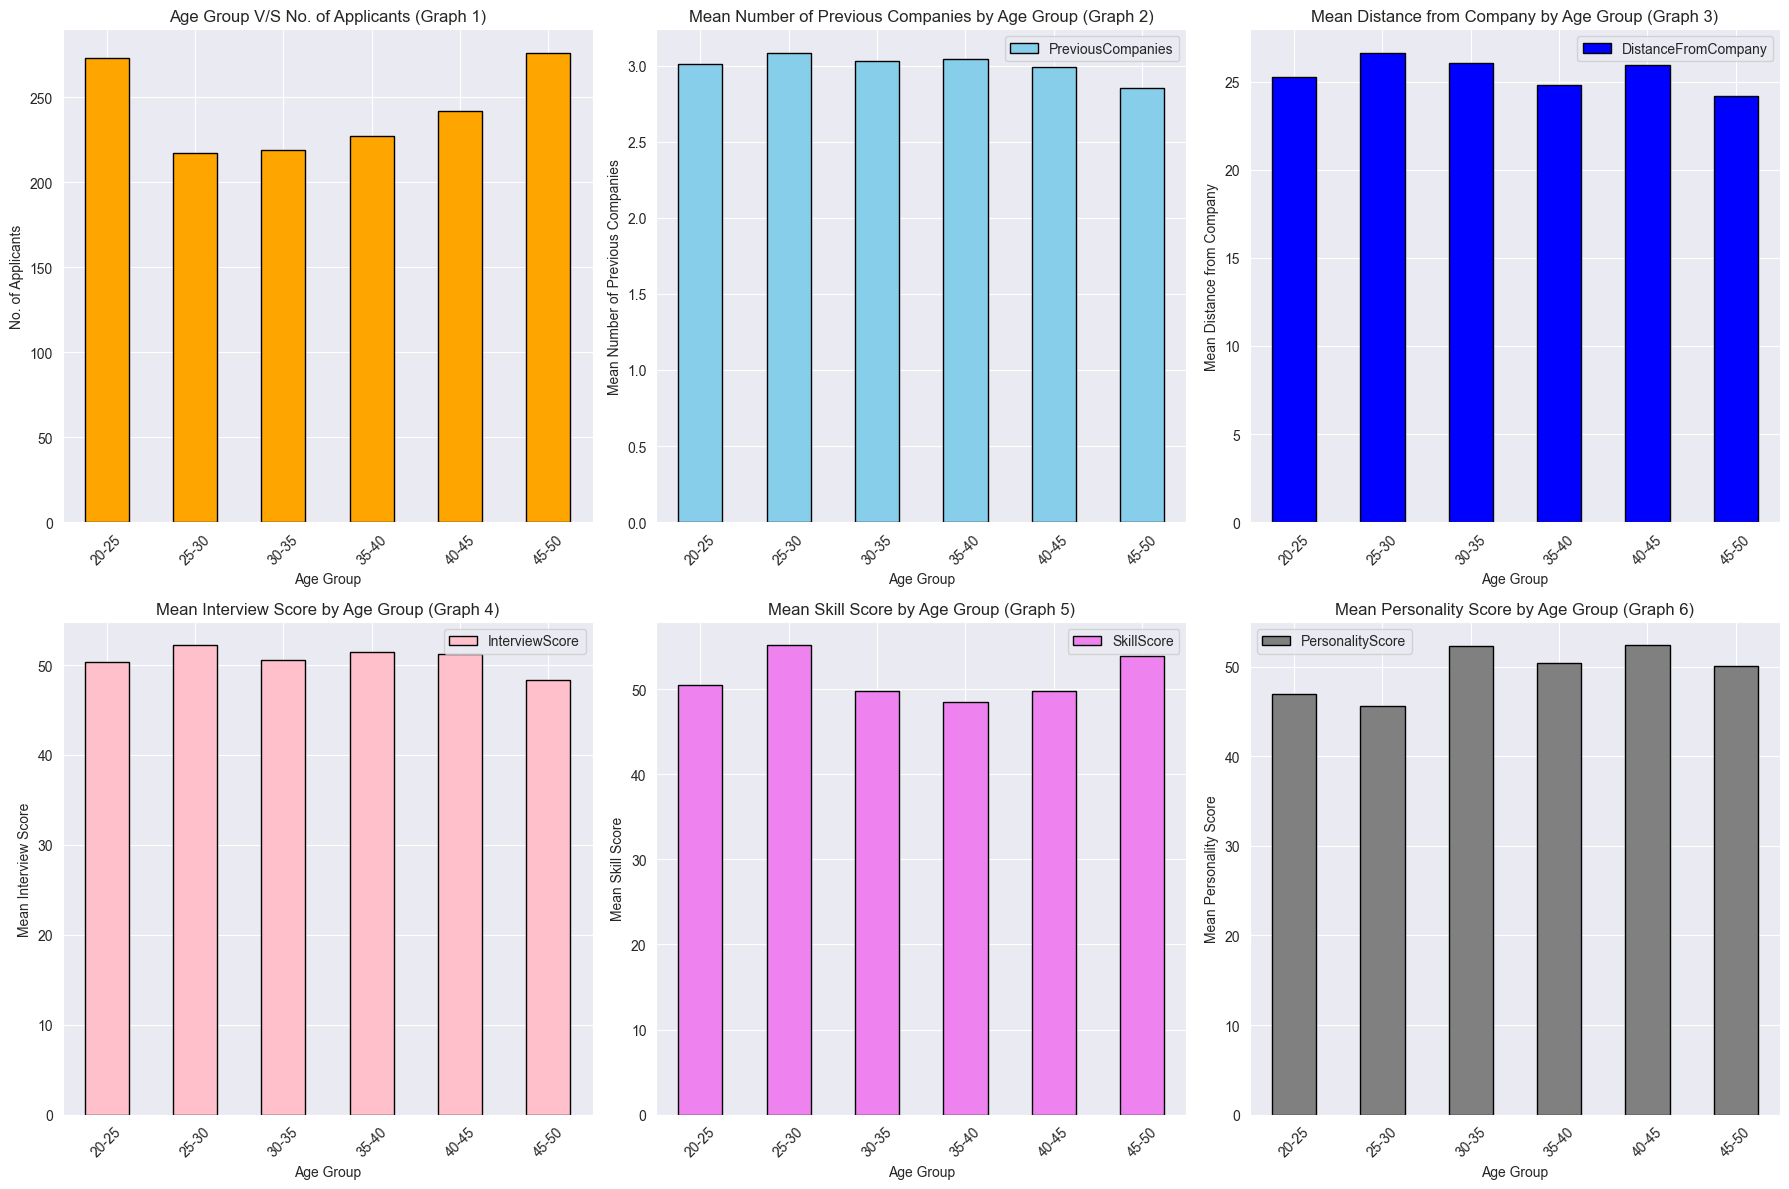

In [53]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot the total number of applicants
dataset_age_na.plot(kind='bar', color='orange', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Age Group V/S No. of Applicants (Graph 1)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('No. of Applicants')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot the mean number of previous companies by age group
dataset_age_pc.plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Mean Number of Previous Companies by Age Group (Graph 2)')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Mean Number of Previous Companies')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot the mean distance from company by age group
dataset_age_dfc.plot(kind='bar', color='blue', edgecolor='black', ax=axes[0, 2])
axes[0, 2].set_title('Mean Distance from Company by Age Group (Graph 3)')
axes[0, 2].set_xlabel('Age Group')
axes[0, 2].set_ylabel('Mean Distance from Company')
axes[0, 2].tick_params(axis='x', rotation=45)

# Plot the mean interview score by age group
dataset_age_is.plot(kind='bar', color='pink', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Mean Interview Score by Age Group (Graph 4)')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Mean Interview Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot the mean skill score by age group
dataset_age_ss.plot(kind='bar', color='violet', edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Mean Skill Score by Age Group (Graph 5)')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Mean Skill Score')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot the mean personality score by age group
dataset_age_ps.plot(kind='bar', color='grey', edgecolor='black', ax=axes[1, 2])
axes[1, 2].set_title('Mean Personality Score by Age Group (Graph 6)')
axes[1, 2].set_xlabel('Age Group')
axes[1, 2].set_ylabel('Mean Personality Score')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()

--> 
Learning through graph 1 : 
  Most of the applicants are freshers (of age 20-25) or are very experienced (of age 45-50).
  

Learning through graph 2 :
  Applicants of all age group has some prior experience in other companies (even the freshers). This indicates that the freshers of these generation tend to switch companies on a regular basis rather than evolving oneself at a particular company. This will indicate the HR team to prioritize applicants of higher age group. 


Learning through graph 3 : 
  Mean distance of applicants from company reduces as we go towards higher age group. This indicates that as the age increases people prefer to travel to company less and find a job nearby.


Learning through graph 4 : 
  Interview score of all applicants are almost in the same range. 


Learning through graph 5 : 
  Applicants who have joined services since a while and those who are very much experienced have the highest skill score.


Learning through graph 6 : 
  As we move towards higher age group, we find an increase in personality score. Through this, we understand that as a person gets experienced, his/her personality gets better. 

## Exploring through Gender

### Grouping data through Gender

In [54]:
dataset_gender = dataset[['Gender', 'HiringDecision']]
dataset_gender = dataset_gender.groupby('Gender').sum(numeric_only = True)
print(dataset_gender)

        HiringDecision
Gender                
0                  237
1                  228


### Calculating total male & female applicants

In [55]:
male = dataset['Gender'].sum()
female = 1500 - male
print('Total male applicants : ', male)
print('Total female applicants : ', female)

Total male applicants :  738
Total female applicants :  762


### Calculating % of male and female hired

In [56]:
percent_male_hired = 237/male 
percent_female_hired = 228/female
percent_applicant_hired = (237+228)/1500
print(f"Percentage of male hired: {percent_male_hired * 100:.2f}%")
print(f"Percentage of female hired: {percent_female_hired * 100:.2f}%")
print(f"Percentage of applicants hired: {percent_applicant_hired * 100:.2f}%")

Percentage of male hired: 32.11%
Percentage of female hired: 29.92%
Percentage of applicants hired: 31.00%


--> % of male hired is greater than that of female hired

### Calculating mean age of applicants

In [57]:
age_sum_male = 0
age_sum_female = 0
for i in range(len(dataset)):
    if(dataset.Gender[i] == 0):
        age_sum_male += dataset.Age[i]
    else:
        age_sum_female += dataset.Age[i]

print("Mean age of a male applicant : ", age_sum_male/male)
print("Mean age of a female applicant : ", age_sum_female/female)

Mean age of a male applicant :  36.18563685636856
Mean age of a female applicant :  34.14435695538058


### Scale Interview, Skill and Personality 

### Creating a dataset for scaled values

In [58]:
dataset_gender_scaled = dataset[['Gender', 'EducationLevel', 'InterviewScore','SkillScore','PersonalityScore','PreviousCompanies', 'RecruitmentStrategy']]
print(dataset_gender_scaled)

      Gender  EducationLevel  InterviewScore  SkillScore  PersonalityScore  \
0          1               2              48          78                91   
1          1               4              35          68                80   
2          0               2              20          67                13   
3          1               2              36          27                70   
4          0               1              23          52                85   
...      ...             ...             ...         ...               ...   
1495       0               2              66           3                80   
1496       1               2              43          97                 7   
1497       1               1              31          91                58   
1498       0               2               9          37                44   
1499       1               2              63          40                26   

      PreviousCompanies  RecruitmentStrategy  
0               

### Scaling down Interview, SKill and Personality score (out of 4)

In [59]:
is_scaled = []
ss_scaled = []
ps_scaled = []

for i in range(len(dataset_gender_scaled['InterviewScore'])):
    score = dataset_gender_scaled.InterviewScore[i]/25
    is_scaled.append(score)

for i in range(len(dataset_gender_scaled['SkillScore'])):
    score = dataset_gender_scaled.SkillScore[i]/25
    ss_scaled.append(score)

for i in range(len(dataset_gender_scaled['PersonalityScore'])):
    score = dataset_gender_scaled.PersonalityScore[i]/25
    ps_scaled.append(score)


print(is_scaled)
print(ss_scaled)
print(ps_scaled)

[1.92, 1.4, 0.8, 1.44, 0.92, 2.16, 0.96, 0.24, 3.2, 3.68, 3.72, 2.8, 3.84, 2.8, 0.92, 0.4, 2.88, 0.44, 1.36, 2.48, 2.68, 3.96, 3.64, 2.24, 0.48, 0.88, 3.28, 4.0, 1.52, 3.48, 3.16, 3.84, 0.44, 1.32, 2.8, 2.96, 1.2, 3.68, 2.44, 0.48, 1.2, 0.04, 0.56, 2.24, 2.96, 1.32, 2.68, 2.96, 1.12, 2.6, 0.6, 1.52, 3.04, 1.44, 3.2, 0.8, 1.72, 0.72, 2.8, 0.28, 3.04, 4.0, 2.6, 1.6, 2.96, 3.48, 2.76, 2.4, 1.0, 2.8, 3.28, 2.76, 1.12, 2.6, 0.72, 2.68, 2.28, 2.76, 2.24, 1.44, 2.4, 3.64, 1.16, 2.8, 2.88, 0.96, 3.84, 2.56, 0.2, 0.68, 0.36, 3.64, 0.4, 3.84, 2.56, 3.04, 4.0, 3.32, 2.56, 2.04, 2.64, 3.24, 3.08, 1.2, 3.6, 0.64, 2.16, 3.68, 1.4, 4.0, 1.0, 2.08, 0.64, 3.4, 0.96, 0.04, 3.4, 0.16, 0.12, 1.4, 0.2, 0.8, 3.04, 4.0, 3.52, 1.0, 2.16, 1.52, 3.32, 1.28, 0.52, 2.2, 3.96, 3.2, 0.8, 1.8, 0.6, 0.6, 3.32, 1.12, 3.64, 0.28, 3.48, 0.08, 3.52, 0.72, 3.84, 2.6, 3.12, 3.4, 2.92, 3.24, 0.84, 1.8, 3.6, 0.48, 1.28, 0.16, 3.56, 3.04, 1.04, 3.08, 0.92, 2.64, 2.48, 3.72, 3.92, 1.88, 2.48, 3.08, 0.44, 1.08, 1.72, 3.68, 1.68

### Adding scaled values to the dataset 

In [60]:
dataset_gender_scaled['InterviewScoreScaled'] = is_scaled
dataset_gender_scaled['SkillScoreScaled'] = ss_scaled
dataset_gender_scaled['PersonalityScoreScaled'] = ps_scaled
dataset_gender_scaled['AgeGroup'] = dataset_age['AgeGroup']

C:\Users\yashyashahshah2005\AppData\Local\Temp\ipykernel_6608\854645519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_gender_scaled['InterviewScoreScaled'] = is_scaled
C:\Users\yashyashahshah2005\AppData\Local\Temp\ipykernel_6608\854645519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_gender_scaled['SkillScoreScaled'] = ss_scaled
C:\Users\yashyashahshah2005\AppData\Local\Temp\ipykernel_6608\854645519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

### Displaying the dataset

In [61]:
dataset_gender_scaled

,Gender,EducationLevel,InterviewScore,SkillScore,PersonalityScore,PreviousCompanies,RecruitmentStrategy,InterviewScoreScaled,SkillScoreScaled,PersonalityScoreScaled,AgeGroup
0,1,2,48,78,91,3,1,1.92,3.12,3.64,25-30
1,1,4,35,68,80,3,2,1.40,2.72,3.20,35-40
2,0,2,20,67,13,2,2,0.80,2.68,0.52,45-50
3,1,2,36,27,70,2,3,1.44,1.08,2.80,30-35
4,0,1,23,52,85,1,2,0.92,2.08,3.40,30-35
...,...,...,...,...,...,...,...,...,...,...,...
1495,0,2,66,3,80,4,3,2.64,0.12,3.20,45-50
1496,1,2,43,97,7,3,2,1.72,3.88,0.28,25-30
1497,1,1,31,91,58,2,1,1.24,3.64,2.32,20-25
1498,0,2,9,37,44,4,2,0.36,1.48,1.76,45-50


### Barplot Visualization for different rows and columns

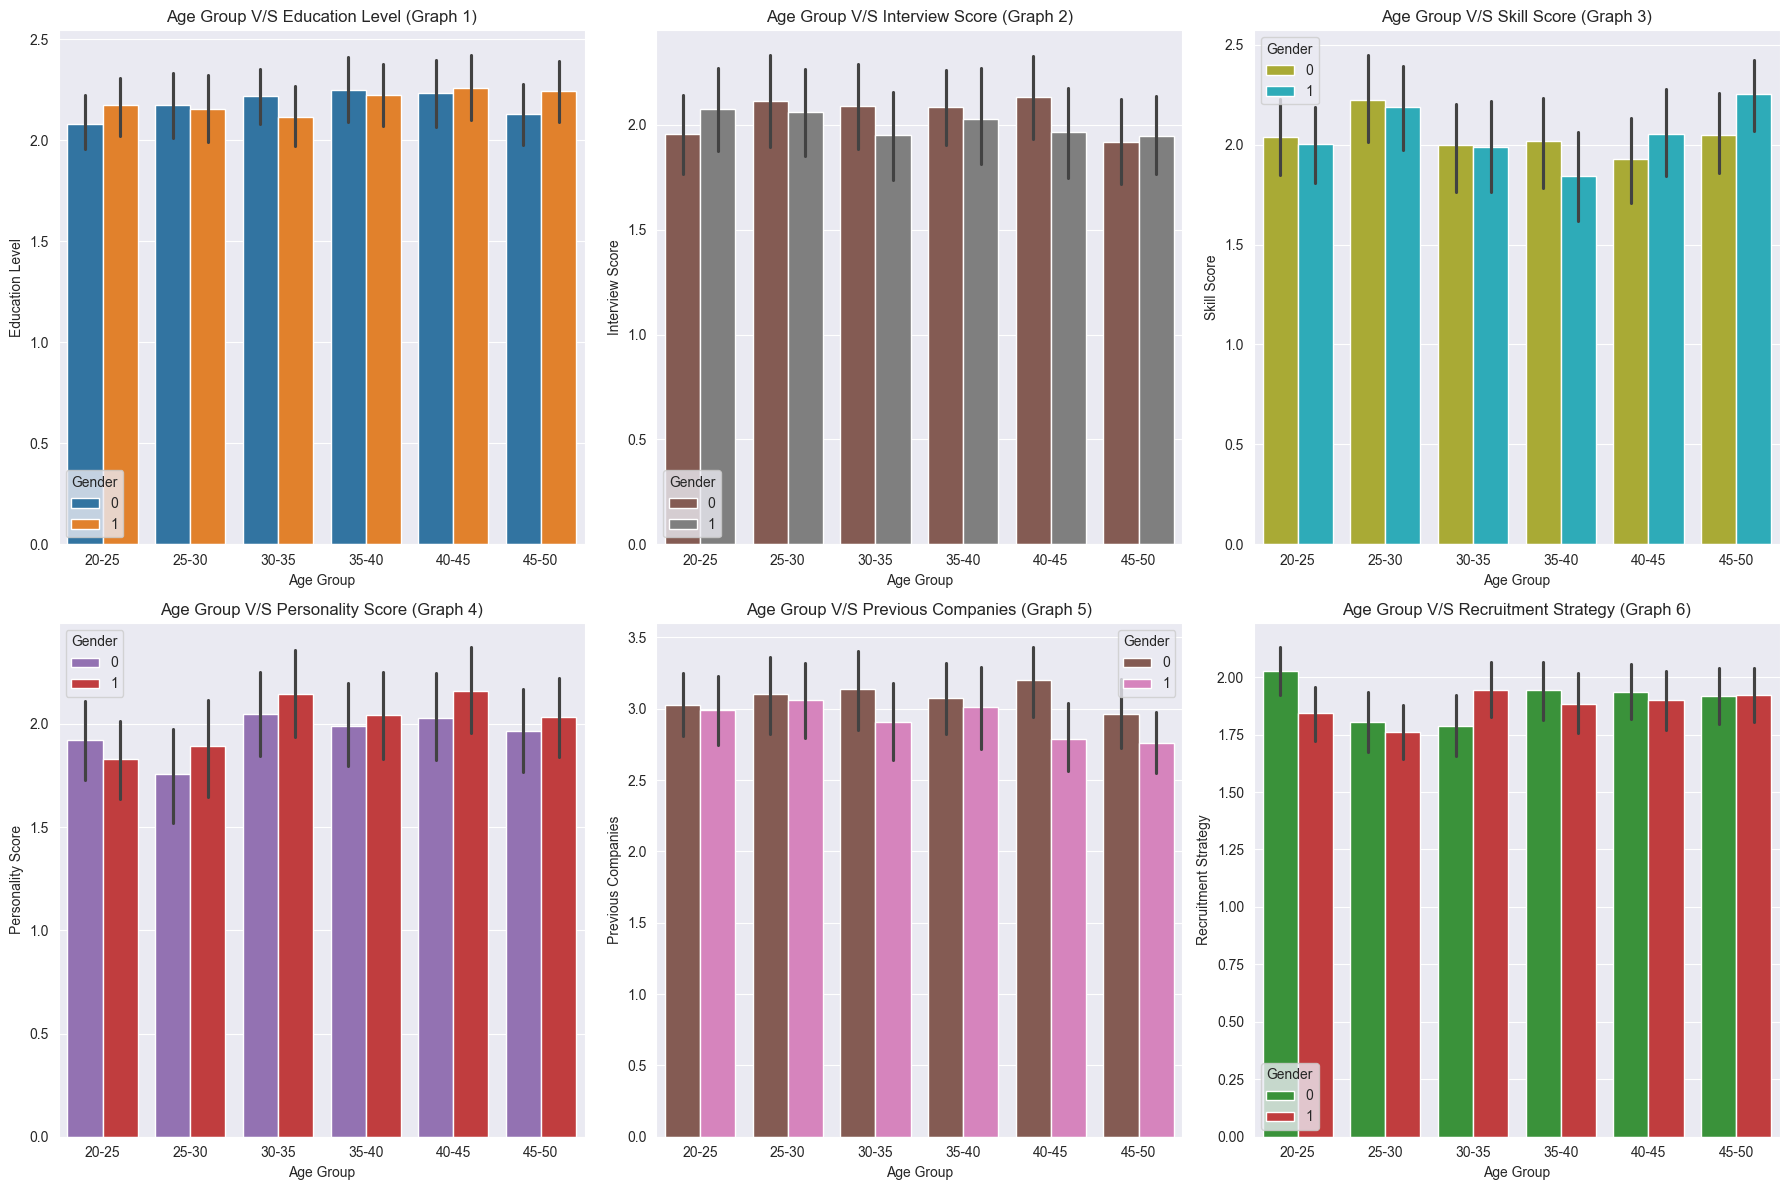

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.set_style("darkgrid")

custom_palette_2 = {
    0 : '#8c564b',
    1 : '#7f7f7f'
}

custom_palette_3 = {
    0 : '#bcbd22',
    1 : '#17becf' 
}

custom_palette_4 = {
    0 : '#9467bd',
    1 : '#d62728' 
}

custom_palette_5 = {
    0 : '#8c564b',
    1 : '#e377c2' 
}

custom_palette_6 = {
    0 : '#2ca02c',
    1 : '#d62728'
}

# Education Level
sns.barplot(x = 'AgeGroup', y ='EducationLevel', hue = 'Gender', data = dataset_gender_scaled, ax=axes[0,0])
axes[0, 0].set_title('Age Group V/S Education Level (Graph 1)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Education Level')

# Interview Score
sns.barplot(x='AgeGroup', y='InterviewScoreScaled', hue='Gender', data=dataset_gender_scaled, palette=custom_palette_2, ax=axes[0, 1])
axes[0, 1].set_title('Age Group V/S Interview Score (Graph 2)')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Interview Score')

# Skill Score
sns.barplot(x='AgeGroup', y='SkillScoreScaled', hue='Gender', data=dataset_gender_scaled, palette=custom_palette_3, ax=axes[0, 2])
axes[0, 2].set_title('Age Group V/S Skill Score (Graph 3)')
axes[0, 2].set_xlabel('Age Group')
axes[0, 2].set_ylabel('Skill Score')

# Personality Score
sns.barplot(x='AgeGroup', y='PersonalityScoreScaled', hue='Gender', data=dataset_gender_scaled, palette=custom_palette_4, ax=axes[1, 0])
axes[1, 0].set_title('Age Group V/S Personality Score (Graph 4)')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Personality Score')

# Previous Companies
sns.barplot(x='AgeGroup', y='PreviousCompanies', hue='Gender', data=dataset_gender_scaled, palette=custom_palette_5, ax=axes[1, 1])
axes[1, 1].set_title('Age Group V/S Previous Companies (Graph 5)')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Previous Companies')

# Recruitment Strategy
sns.barplot(x='AgeGroup', y='RecruitmentStrategy', hue='Gender', data=dataset_gender_scaled, palette=custom_palette_6, ax=axes[1, 2])
axes[1, 2].set_title('Age Group V/S Recruitment Strategy (Graph 6)')
axes[1, 2].set_xlabel('Age Group')
axes[1, 2].set_ylabel('Recruitment Strategy')

plt.tight_layout()

--> 
Learning through graph 1 : 
  Education levels remain relatively consistent across different age groups. There is no significant variation in education levels when comparing different genders within the same age group. Both male and female individuals have similar education levels in each age group.


Learning through graph 2 : 
  Interview scores are fairly consistent across different age groups, with a slight upward trend in the older age groups. There is also a consistent performance between different genders within the same age group, indicating no significant gender bias in interview scores.


Learning through graph 3 : 
  Skill scores are generally consistent across different age groups, with a slight increase as age increases. Both genders have similar skill scores within each age group, suggesting that skill levels do not vary significantly by gender.


Learning through graph 4 : 
  Personality scores show more variation compared to other metrics. The age group 30-35 has higher personality scores for both genders. Males generally have slightly higher personality scores than females in most age groups.

Learning through graph 5 : 
  The number of previous companies increases with age, peaking in the 35-40 age group, and then slightly decreasing for older age groups. This trend is consistent for both genders, indicating that experience (in terms of previous companies) accumulates with age but may plateau or decrease slightly as individuals reach older age groups.


Learning through graph 6 :
  Recruitment strategies are consistent across age groups, with no significant variation between genders. This suggests that recruitment strategies are uniformly applied across different age groups and genders.

## Prediction through Artificial Neural Network

### Part-1 Data Pre- Processing

### Segregating independent and dependent variables

In [63]:
X = dataset.iloc[ : , :-1].values
y = dataset.iloc[ : , -1].values

### Splitting the data into training test and test set

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size= 0.8, random_state = 0)

### Feature Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Part-2 Building ANN

### Initializing the ANN

In [66]:
ann = tf.keras.models.Sequential()

### Adding input layer to first hidden layer

In [67]:
ann.add(tf.keras.layers.Dense(units = 20, activation = 'relu'))

### Adding the second hidden layer

In [68]:
ann.add(tf.keras.layers.Dense(units = 20, activation = 'relu'))

### Adding the output layer

In [69]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

### Part-3 Trainig the ANN

### Compiling the ANN

In [70]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN model on the training set

In [71]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6524 - loss: 0.6485
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6712 - loss: 0.5869 
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7212 - loss: 0.5228 
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - loss: 0.4784
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8295 - loss: 0.4457
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8518 - loss: 0.4050
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8624 - loss: 0.3634 
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.8637 - loss: 0.3797
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - accuracy: 0.8604 - loss: 0.3548
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.8745 - loss: 0.3612
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8900 - loss: 0.3067 
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

### Part-4 Making Predictions and Evaluating the model

### Predicting the test set results

In [72]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 

### Setting up some imporatant mean parameters w.r.t data description and correlation

In [73]:
mean_edu = 2
mean_i_score = 50
mean_s_score = 51
mean_p_score = 49

### Making a single prediction

In [74]:
age = int(input("Enter your age : "))
gender = int(input("Select your gender (0- female  1-male) : "))
edu_level = int(input("Select your educational level : \n1. Bachelor's (Type 1) \n2. Bachelor's (Type 2) \n3. Master's \n4. Phd\n"))
exp = int(input("Enter years of experience : "))
prev_comp = int(input("Enter no. of companies in which you worked previously"))
dist = float(input("Enter your distance from comapny (in km) : "))
i_score = int(input("Enter your interview score (out of 100) : "))
s_score = int(input("Enter your skill score (out of 100) : "))
p_score = int(input("Enter your personality score (out of 100) : "))
recruit_strategy = int(input("Enter recruitment strategy : \n1. Aggresive \n2. Moderate \n. Conservative"))

if(ann.predict(sc.transform([[age, gender, edu_level, exp, prev_comp , dist, i_score, s_score, p_score, recruit_strategy]])) > 0.5):
    hire_status = True
else:
    hire_status = False

if(hire_status == True):
    print("Congrats! You're hired :)")
else:
    print("We're sorry, You're not hired. Try working upon following aspects : \n")
    if(edu_level <= mean_edu):
        print("Get some more knowledge through education")
    if(i_score <= mean_i_score):
        print("Try getting some more confidence during interview")
    if(s_score <= mean_s_score):
        print("Consider focusing on increasing your skill level to achieve greater success and growth.")
    if(p_score <= mean_p_score):
        print("Consider improving your personality by fostering a positive attitude, practicing active listening, and building your confidence.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
We're sorry, You're not hired. Try working upon following aspects : 

Get some more knowledge through education


### Making the Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Making the confusion matrix
cm = confusion_matrix(y_pred, y_test)
print(cm)

# Accuracy Score
print(f"Accuracy obtained: {accuracy_score(y_pred, y_test)*100:.2f} %")

# Precision
precision = precision_score(y_pred, y_test)
print(f"Precision obtained: {precision*100:.2f} %")

# Recall
recall = recall_score(y_pred, y_test)
print(f"Recall obtained: {recall*100:.2f} %")

# F1 Score
f1 = f1_score(y_pred, y_test)
print(f"F1 Score obtained: {f1*100:.2f} %")

[[197  23]
 [ 14  66]]
Accuracy obtained: 87.67 %
Precision obtained: 74.16 %
Recall obtained: 82.50 %
F1 Score obtained: 78.11 %
